<div align="center"> <h1> Uso de Dinâmica Molecular para Validação e Análise de Pose Sugerida por Docking </h1></div>

<div align="center"> <h2> Projeto final da disciplina QBQ5782 – Simulação Computacional de Biomoléculas </h2></div>

<div align="center"> <h3> Artur Caminero Gomes Soares - nUSP: 4359731 </h3></div>

# 1. Introdução

### A Cannabis sativa é uma planta popular, usada há milênios pela humanidade. Um de seus usos medicinais mais antigos é no tratamento de dor, havendo relatos de seu uso como anestésico na China antiga e analgésico no Egito, Roma e Índia antigos. Seus efeitos medicinais estimularam pesquisas por seus ingredientes ativos, o que levou à descoberta do (−)-∆9-trans-(6aR,10aR)-tetra-hidrocanabinol (THC), seu principal composto ativo, em 1964. Acreditava-se que a planta poderia ter efeito não-específico, até que em 1990 foi provada a existência do Receptor Canabinóide 1 (CB1) e do Receptor Canabinóide 2 (CB2) em 1993.

### O Receptor CB1 tem a sua principal função em modular a liberação de neurotransmissores présinápticos, e está principalmente localizado no Sistema Nervoso Central (SNC). Sua modulação foi explorada para planejamento de novos fármacos, porém, devido a sua ampla presença no SNC, as moléculas apresentam efeito psico-ativo, levando à diversos efeitos adversos indesejados.

### Sobre o receptor CB2, acreditava-se que ele estava presente somente na periferia do sistema nervoso, particularmente no baço e sistema imune, porém, há evidências recentes de sua presença, em menores números, no cérebro, neurônios, trato gastrointestinal, sistema cardiovascular, ossos e sistema reprodutivo. Ao serem estimulados, eles inibem a atividade de adenilato ciclase, diminuindo a concentração intracelular de monofosfato cíclico de adenosina.

### Modulação do receptor CB2 tem recebido bastante atenção faramcológica, tendo possibilidade de auxiliar no tratamento de condições como dor crônica, inflamação, artrite, vício, câncer, entre outros.

# ============================================================

# 2. Objetivo

### Este projeto tem como objetivo realizar uma dinâmica molecular da molécula de THC no sítio ativo do receptor CB2, para assim poder analisar e interpretar a relação entre os dois.

# ============================================================

# 3. Docking

### Para a seção de docking, irei docar a molécula de THC no receptor CB2. 

### A estrutura cristalografada do receptor escolhida foi a de PDB: 6KPF. Esta estrutura foi escolhida por estar co-cristalizada com um agonista (AM12033), por ter melhor resolução (2,90 Å) e não apresentar mutações. 

### O programa selecionado para o docking é o DockThor. Esse programa foi escolhido por ser de fácil uso, ter acesso livre em web-server e por ser brasileiro.

### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

# 3.1. Redocking

### Para validação dos parâmetros utilizados no docking, irei realizar o procedimento de redocking. Neste procedimento, a molécula co-cristalizada com o receptor (o agonsita AM12033) é extraída no pymol. Em seguida, ela é transladada de maneira que seu centro de massa fique no centro cartesiano. Enfim, a molécula é docada no receptor, e é calculado seu RMSD, comparando a posição cristalizada com a posição calculada pelo programa de docking.

In [1]:
from Definitions import *

# Aqui, eu irei importar a molécula, transladá-la e salvá-la.

# Importando sistema
am12033 = ImportSystem("AM12033_extract.mol2")
am12033.label = "AM12033"

am12033.Summary()

# Transladando sistema pro seu centro de massa
massas = Array.FromIterable([atomo.mass for atomo in am12033.atoms])
am12033.coordinates3.TranslateToCenter(weights=massas)

# Salvando sistema
ExportSystem("AM12033_center.mol2", am12033)


System imported from "AM12033_extract.mol2" in Tripos MOL2 format.

--------------------------------------------------------------------------------
                           Summary of System "AM12033"
--------------------------------------------------------------------------------
------------------------------------- Atoms ------------------------------------
Atoms                  =             29  Heavy Atoms            =             29
Hydrogens              =              0
--------------------------------- Connectivity ---------------------------------
Angles                 =             46  Atoms                  =             29
Bonds                  =             31  Dihedrals              =             60
Isolates               =              1  Ring Sets              =              1
--------------------------------------------------------------------------------

System exported to "AM12033_center.mol2" in Tripos MOL2 format.


### As seguintes configurações foram usadas para o redocking:

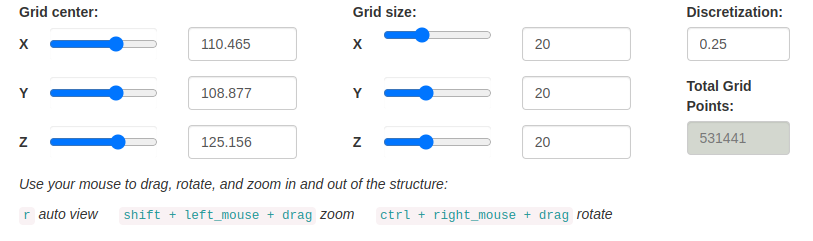

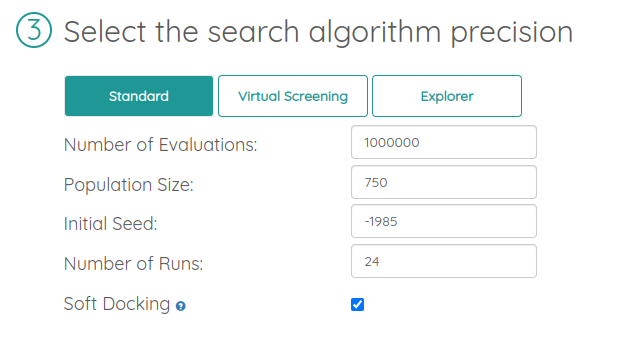

### Abaixo podemos ver os resultados do redocking. Em roxo temos o ligante AM12033, na posição co-cristalografada, enquanto em laranja, observamos a posição previsata pelo DockThor para o mesmo ligante.

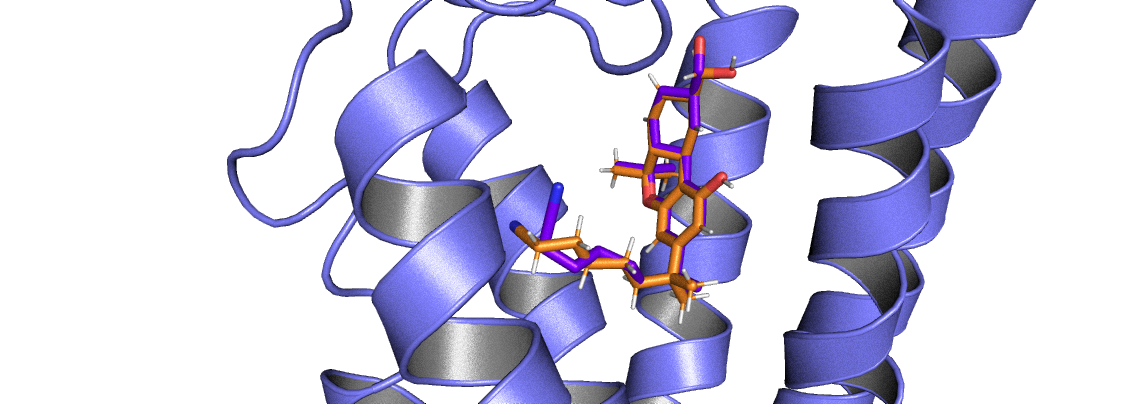

| <h3>Name  | <h3>Score | <h3>T. Energy | <h3>I. Energy | <h3>vdW Energy | <h3>Electrostatic Energy | <h3>RMSD |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| AM12033 | -12369| 54416 | -48314 | -45595 | -2719 | 0.879 |

### Foi obtivo um RMSD de 0,879. Como o valor apresentou-se abaixo de 2, a metodologia utilizada está validada.

### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

# 3.2. Docking do THC

### Com a metologia validada, podemos realizar o docking do THC. Serão feitos 2 dockings:

<ul>
    <h3>1. O THC será docado no sítio ativo, com a mesma caixa utilizada no redocking. </li>     
</ul>

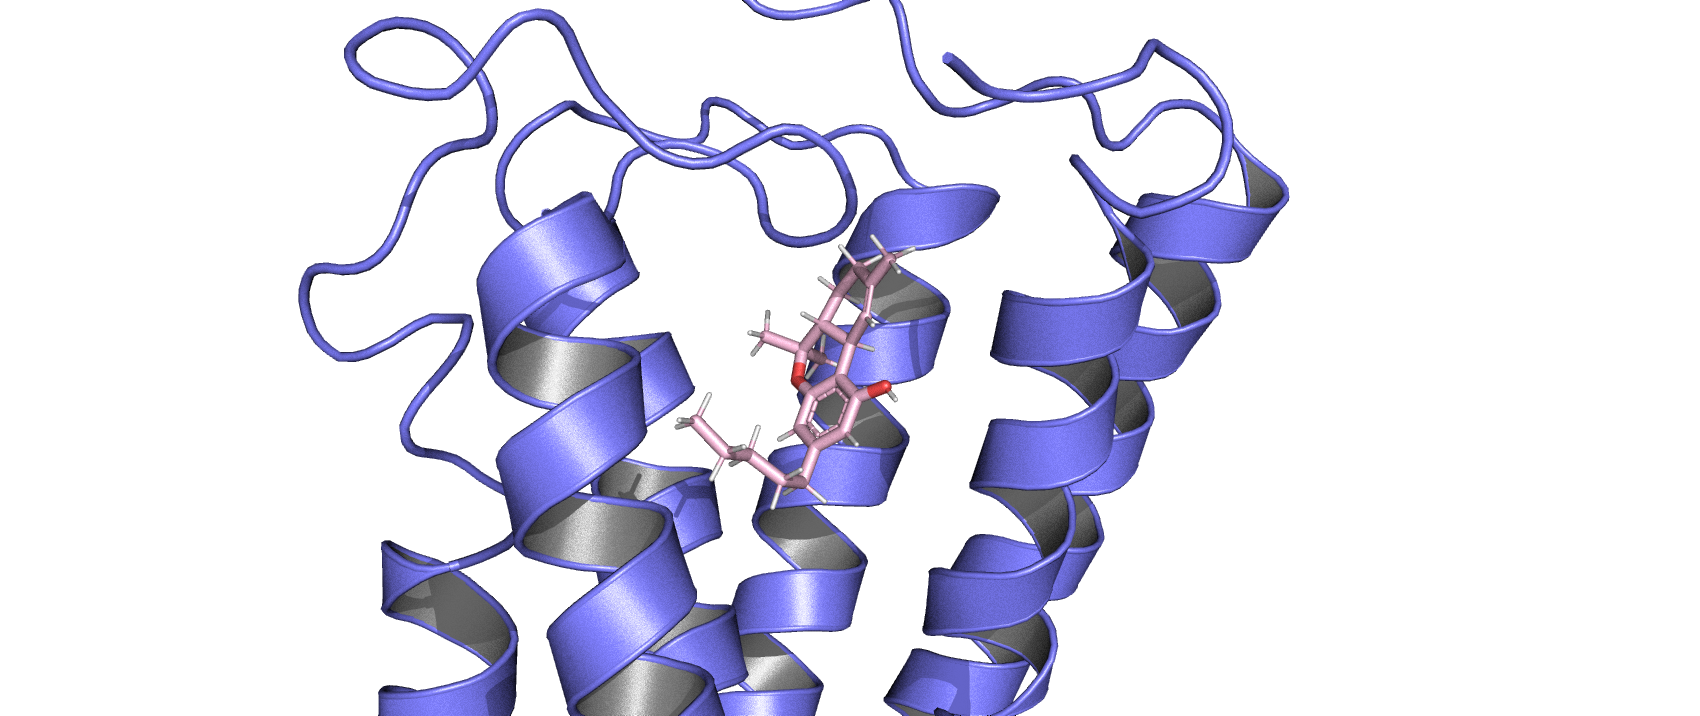

| <h3>Name  | <h3>Score | <h3>T. Energy | <h3>I. Energy | <h3>vdW Energy | <h3>Electrostatic Energy |
| :--- | :--- | :--- | :--- | :--- | :--- |
| THC (sítio ativo) | -11443| 12505 | -38034 | -36516 | -1518 |

<ul>
    <h3>2. O THC será docado em uma região aleatória do receptor. Este procedimento tem o papel de controle negativo. </li>       
</ul>

### Para este docking, foi selecionada uma região que ainda apresenta-se no meio extracelular do receptor, porém não contivesse o sítio ativo. A seguite caixa foi criada:

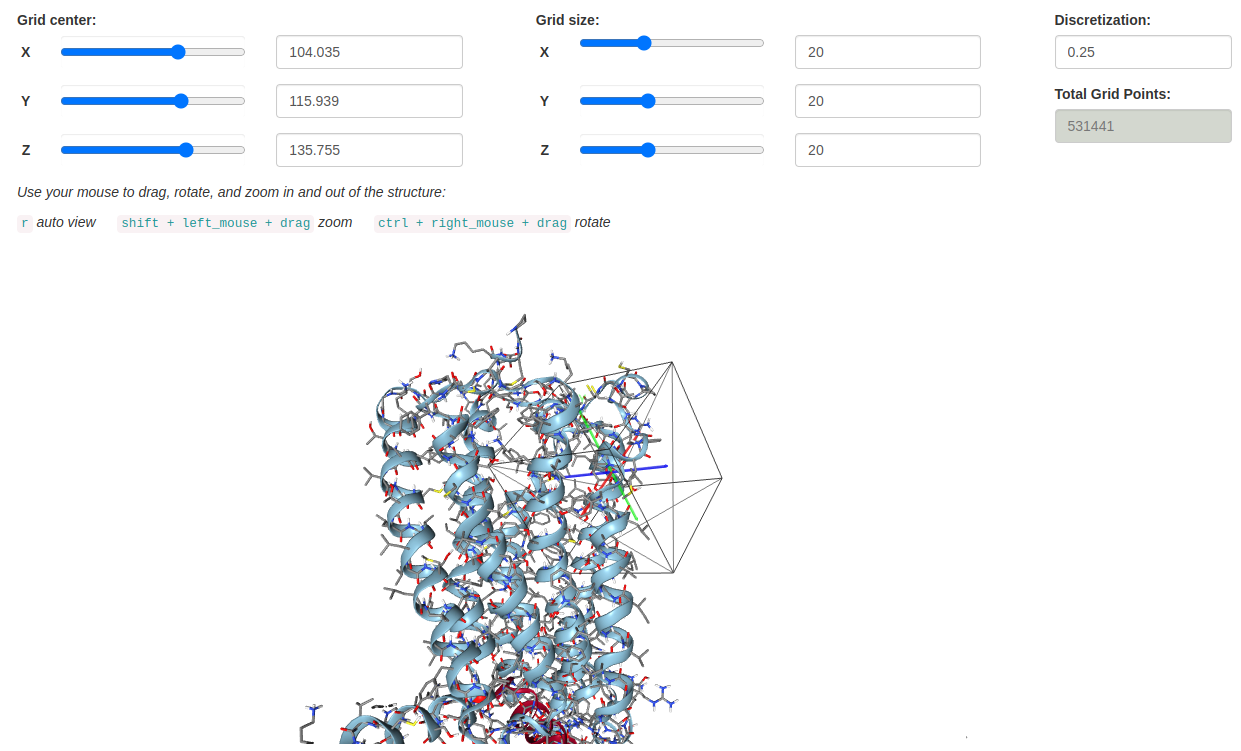

### O Docking apresentou o seguinte resultado:

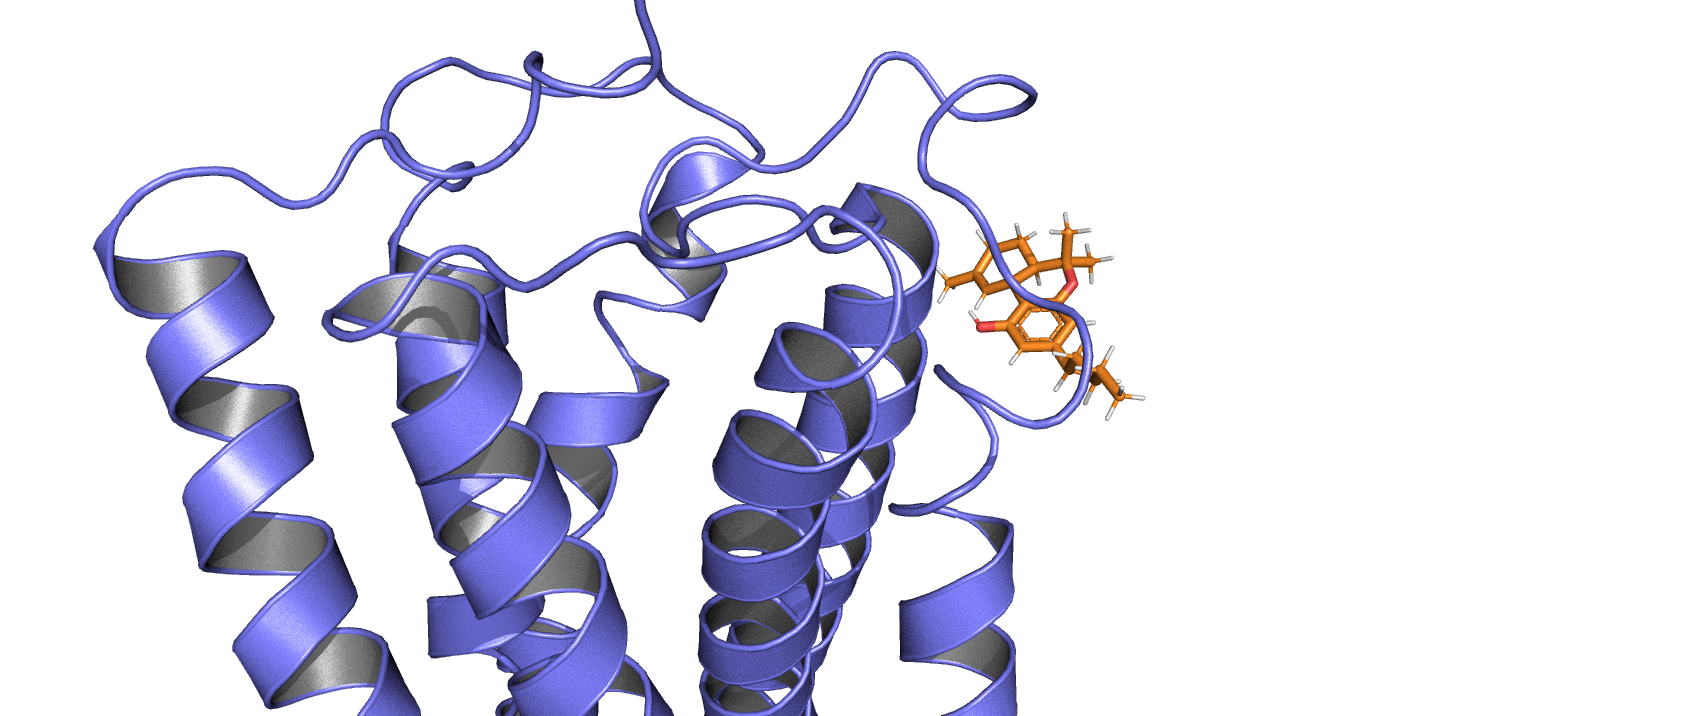

| <h3>Name  | <h3>Score | <h3>T. Energy | <h3>I. Energy | <h3>vdW Energy | <h3>Electrostatic Energy |
| :--- | :--- | :--- | :--- | :--- | :--- |
| THC (controle negativo)| -8226| 31394 | -19965 | -17058 | -2907 |

### Aqui podemos observar as duas posições de docking (em rosa, no sítio ativo, e em laranja, o controle negativo):

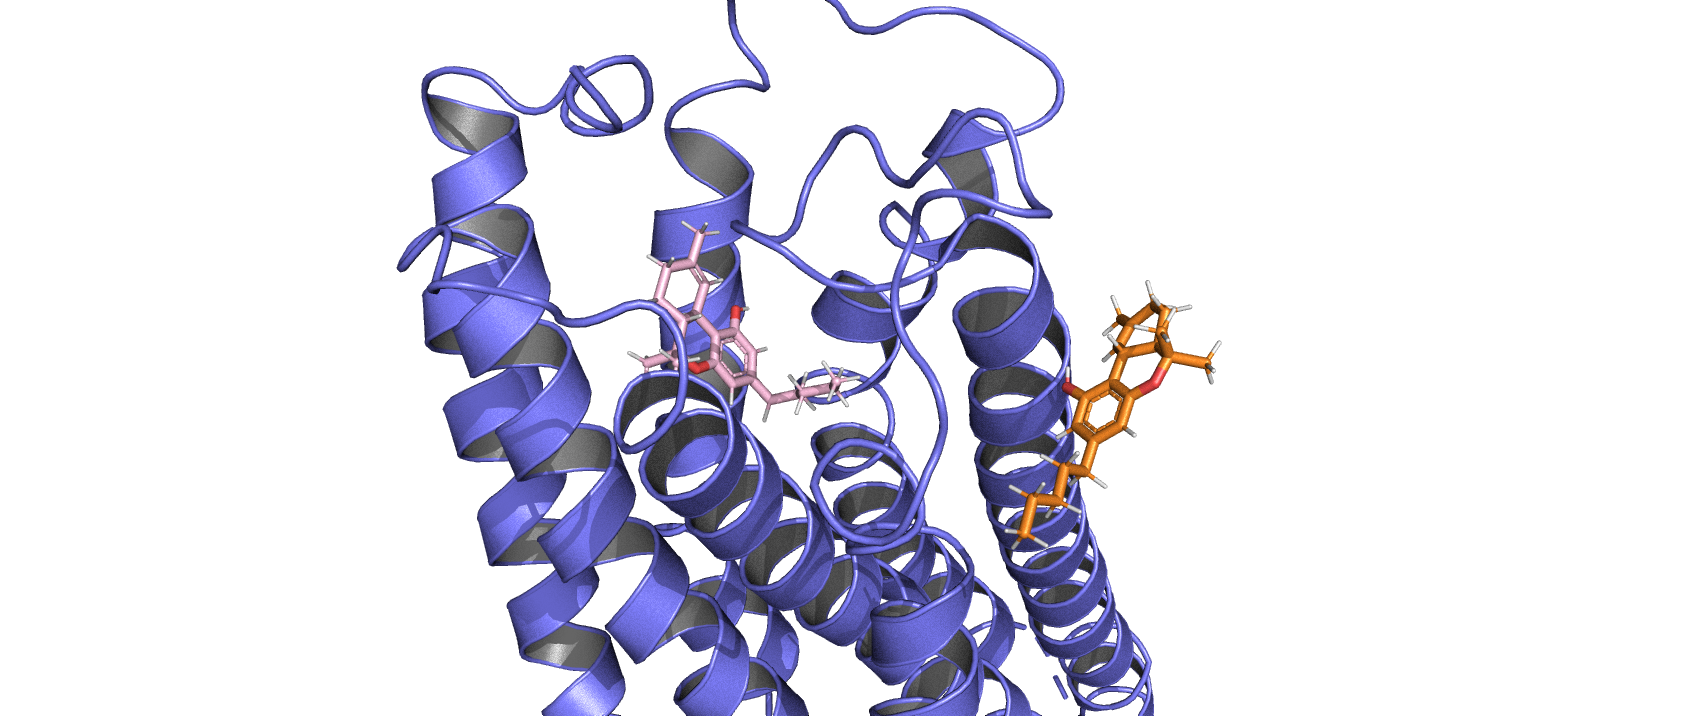

# ============================================================

### A continuação deste notebook pode ser encontrada aqui (ADICIONAR)